# 🎵 Project: Classifying Audio Genres and Predicting Popularity

## 🔹 Problem Statement

With the growing volume of music available on platforms like Spotify, understanding and organizing tracks based on their audio features is crucial for better user experience and music discovery.

The goal of this project is to:
- **Classify** songs into genres based on their audio features.
- **Predict** the **popularity score** of a track using measurable attributes like danceability, energy, and loudness.
- **Identify** key features influencing both popularity and genre.
- **Cluster** similar tracks based on audio similarity.
- **Build** a recommendation system to suggest songs to users.
- **Analyze** music trends over time.

## 🔹 Business Use Case

This solution can benefit:
- **Music streaming platforms** to automate playlist generation, mood-based recommendations, and trend forecasting.
- **Artists and producers** to understand what makes songs popular and how genres evolve.
- **Listeners** by delivering a more personalized music experience.

## 📊 Dataset Source

This dataset has been collected using **Spotify’s Web API** and contains features like:
- Track name, artist, genre
- Audio metrics: danceability, energy, tempo, valence, etc.
- Popularity score (0–100)

---

Let’s now explore the dataset and prepare it for modeling.


#### Load and Clean the Data

In [2]:
# 📦 Step 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 📥 Step 2: Load the dataset
df = pd.read_csv("spotify_data.csv")

# 🧹 Step 3: Drop unnecessary index column
df.drop(columns=['Unnamed: 0'], inplace=True)

# 📊 Step 4: Basic data overview
print("Dataset Shape:", df.shape)
print("\nColumns:\n", df.columns.tolist())
df.head()


Dataset Shape: (114000, 20)

Columns:
 ['track_id', 'artists', 'album_name', 'track_name', 'popularity', 'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'track_genre']


,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


#### Dataset Info and Null Values

In [3]:
# 🔍 Check for missing/null values
print("🧹 Missing Values:\n")
print(df.isnull().sum())

# 📑 Data types and memory info
print("\n📄 Dataset Info:\n")
df.info()

# 📊 Statistical summary of numeric features
df.describe().T


🧹 Missing Values:

track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

📄 Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           114000 non-null  object 
 2   album_name        114000 non-null  object 
 3   track_name        114000 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit  

,count,mean,std,min,25%,50%,75%,max
popularity,114000.0,33.238535,22.305078,0.000,17.00000,35.000000,50.0000,100.000
duration_ms,114000.0,228029.153114,107297.712645,0.000,174066.00000,212906.000000,261506.0000,5237295.000
danceability,114000.0,0.566800,0.173542,0.000,0.45600,0.580000,0.6950,0.985
energy,114000.0,0.641383,0.251529,0.000,0.47200,0.685000,0.8540,1.000
key,114000.0,5.309140,3.559987,0.000,2.00000,5.000000,8.0000,11.000
loudness,114000.0,-8.258960,5.029337,-49.531,-10.01300,-7.004000,-5.0030,4.532
mode,114000.0,0.637553,0.480709,0.000,0.00000,1.000000,1.0000,1.000
speechiness,114000.0,0.084652,0.105732,0.000,0.03590,0.048900,0.0845,0.965
acousticness,114000.0,0.314910,0.332523,0.000,0.01690,0.169000,0.5980,0.996
instrumentalness,114000.0,0.156050,0.309555,0.000,0.00000,0.000042,0.0490,1.000


In [32]:
df.columns


Index(['track_id', 'artists', 'album_name', 'track_name', 'popularity',
       'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre'],
      dtype='object')

#### EDA with Visualizations

📊    Top 15 Most Common Genres

C:\Users\kavya\AppData\Local\Temp\ipykernel_11524\1591769236.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')


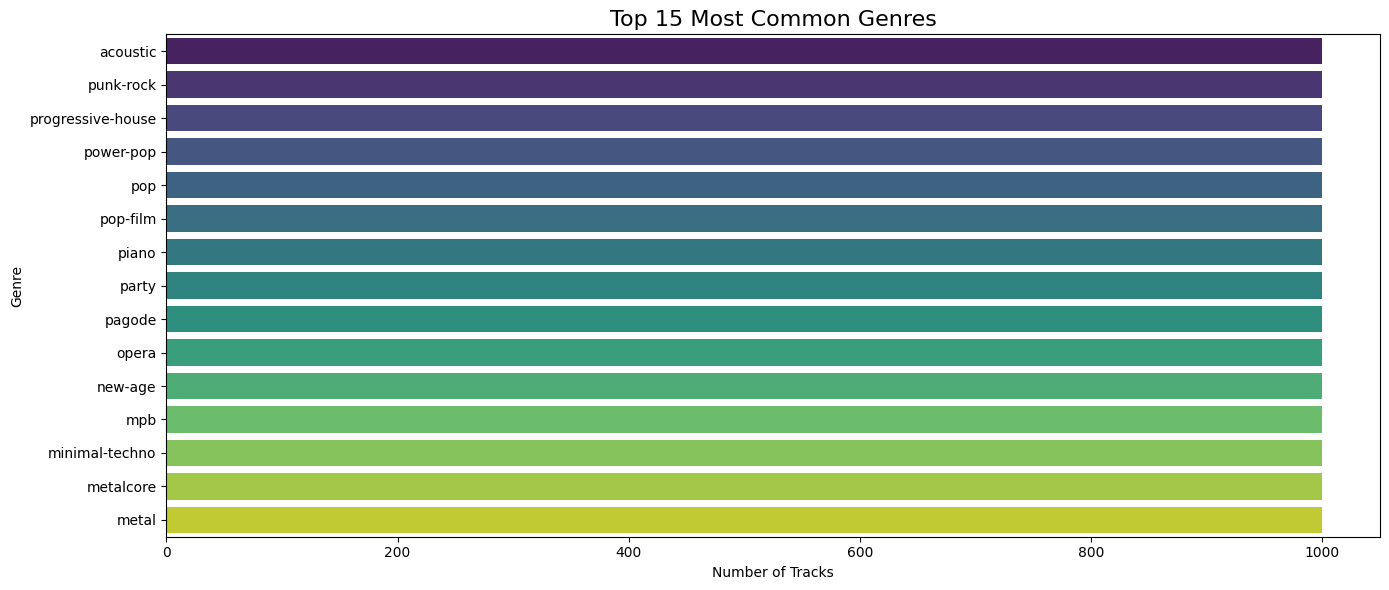

In [4]:
# 🎯 Top genres by frequency
plt.figure(figsize=(14,6))
top_genres = df['track_genre'].value_counts().head(15)
sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')
plt.title('Top 15 Most Common Genres', fontsize=16)
plt.xlabel('Number of Tracks')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()


📈  Popularity Distribution

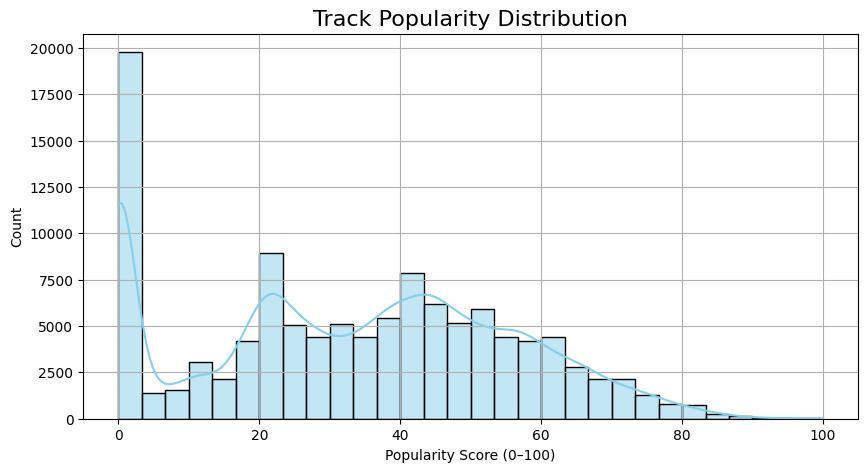

In [5]:
# 📈 Popularity score distribution
plt.figure(figsize=(10,5))
sns.histplot(df['popularity'], bins=30, kde=True, color='skyblue')
plt.title('Track Popularity Distribution', fontsize=16)
plt.xlabel('Popularity Score (0–100)')
plt.ylabel('Count')
plt.grid(True)
plt.show()


📌 Correlation Heatmap for Audio Features

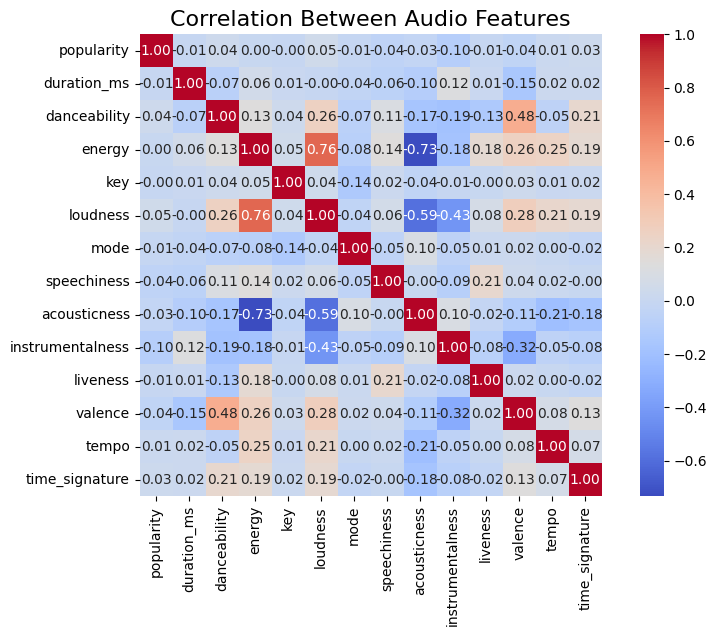

In [6]:
# 🎯 Select only numeric features for correlation
numeric_features = df.select_dtypes(include='number')

# 🔥 Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_features.corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Between Audio Features", fontsize=16)
plt.show()


📌  Feature Behavior by Genre (Danceability, Energy, Valence)

C:\Users\kavya\AppData\Local\Temp\ipykernel_11524\3419937809.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[df['track_genre'].isin(df['track_genre'].value_counts().head(10).index)],


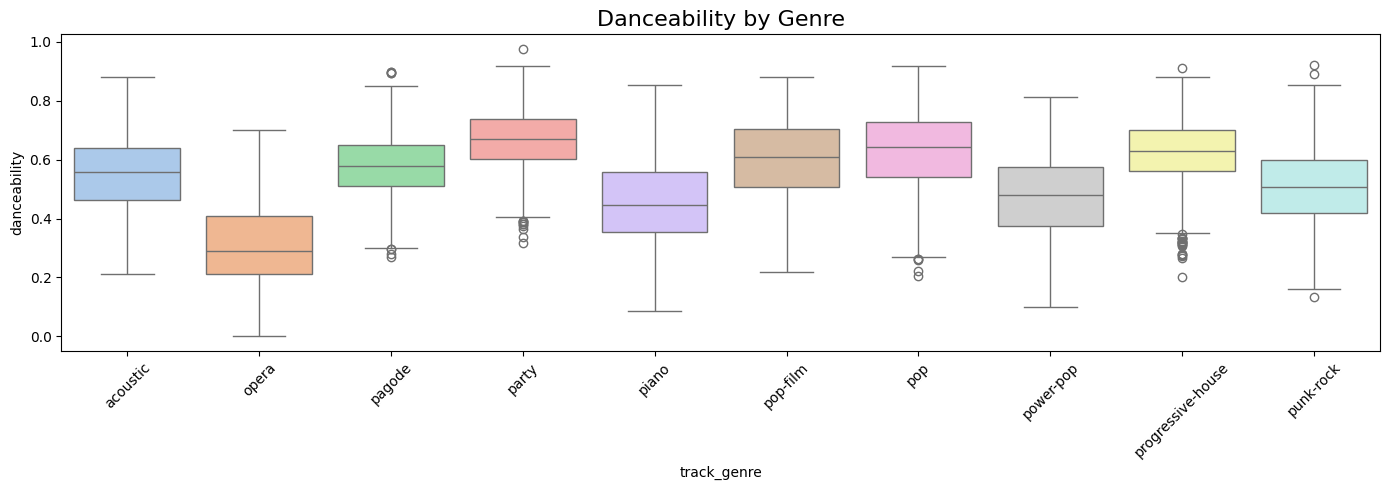

C:\Users\kavya\AppData\Local\Temp\ipykernel_11524\3419937809.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[df['track_genre'].isin(df['track_genre'].value_counts().head(10).index)],


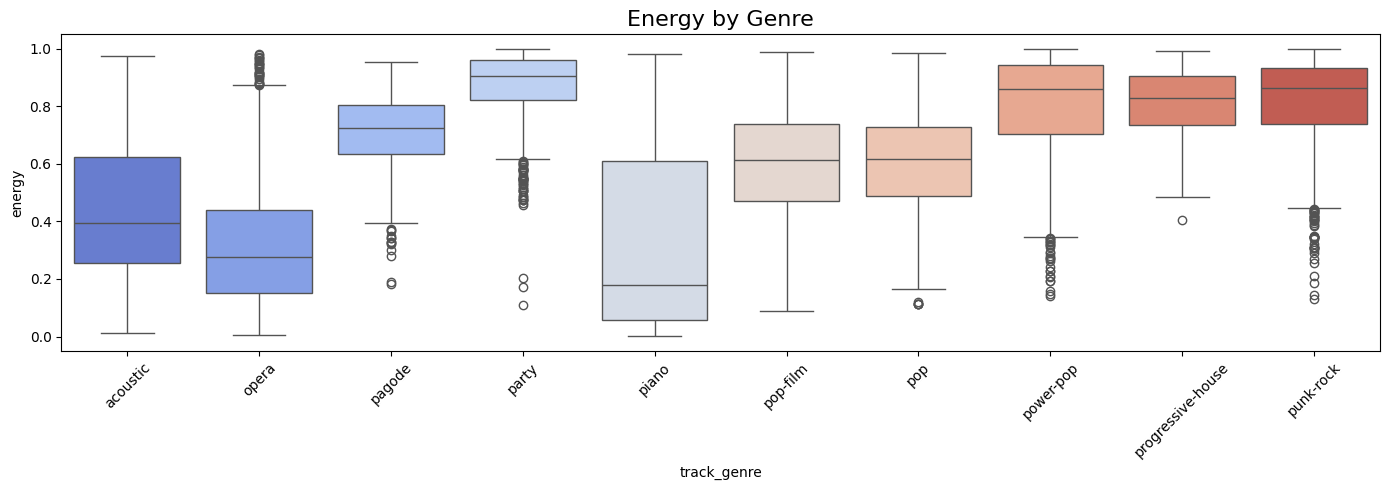

C:\Users\kavya\AppData\Local\Temp\ipykernel_11524\3419937809.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[df['track_genre'].isin(df['track_genre'].value_counts().head(10).index)],


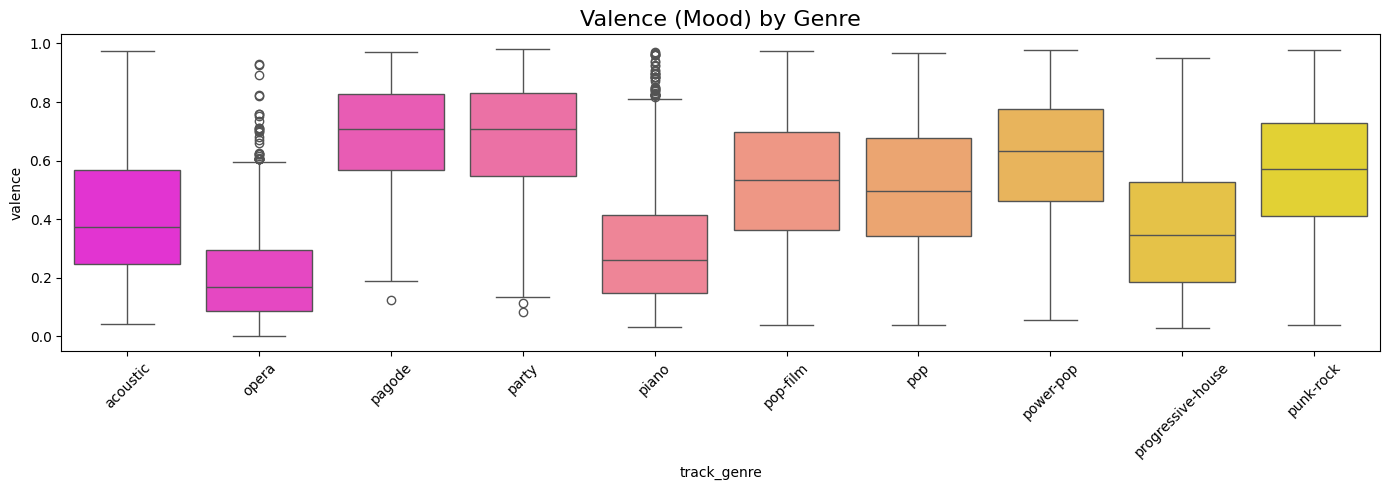

In [7]:
# 🎵 How danceability varies by genre
plt.figure(figsize=(14, 5))
sns.boxplot(data=df[df['track_genre'].isin(df['track_genre'].value_counts().head(10).index)],
            x='track_genre', y='danceability', palette='pastel')
plt.title('Danceability by Genre', fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 📊 Energy by Genre
plt.figure(figsize=(14, 5))
sns.boxplot(data=df[df['track_genre'].isin(df['track_genre'].value_counts().head(10).index)],
            x='track_genre', y='energy', palette='coolwarm')
plt.title('Energy by Genre', fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 😊 Valence by Genre
plt.figure(figsize=(14, 5))
sns.boxplot(data=df[df['track_genre'].isin(df['track_genre'].value_counts().head(10).index)],
            x='track_genre', y='valence', palette='spring')
plt.title('Valence (Mood) by Genre', fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



### Prepare Data for Modeling

##### Data Preparation (Feature Selection + Encoding)

In [8]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# 🎯 Keep only Top 20 Genres
top_20_genres = df['track_genre'].value_counts().head(20).index.tolist()
df_filtered = df[df['track_genre'].isin(top_20_genres)].copy()

# 🧹 Drop unused columns
df_model = df_filtered.drop(columns=['track_id', 'track_name', 'album_name', 'artists'])

# 🔢 Label Encoding
le = LabelEncoder()
df_model['genre_encoded'] = le.fit_transform(df_model['track_genre'])

# Save mapping
genre_mapping = dict(zip(le.classes_, le.transform(le.classes_)))

# 🚫 Drop original genre column
df_model.drop(columns=['track_genre'], inplace=True)

# 🎛️ Prepare features and targets
X = df_model.drop(columns=['popularity', 'genre_encoded'])
y_genre = df_model['genre_encoded']
y_pop = df_model['popularity']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [9]:
# ✅ Select only the required 12 features
feature_list = [
    'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
    'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms'
]

# 🎯 Prepare input features for scaling and model training
X = df_model[feature_list]
y_genre = df_model['genre_encoded']
y_pop = df_model['popularity']

# ✅ Scale the 12 features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [10]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingRegressor
from sklearn.model_selection import train_test_split

# 🎯 Genre Classification
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_scaled, y_genre, test_size=0.2, random_state=42)
clf_rf = RandomForestClassifier(n_estimators=30, class_weight='balanced', random_state=42)
clf_rf.fit(X_train_cls, y_train_cls)

# 📈 Popularity Regression
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_scaled, y_pop, test_size=0.2, random_state=42)
reg = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
reg.fit(X_train_reg, y_train_reg)



GradientBoostingRegressor(random_state=42)

Genre Classification Model (Multi-class Classification)

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(
    X_scaled, y_genre, test_size=0.2, random_state=42
)

clf_rf = RandomForestClassifier(n_estimators=30, class_weight='balanced', random_state=42)
clf_rf.fit(X_train_cls, y_train_cls)

y_pred_rf = clf_rf.predict(X_test_cls)

print("🎯 Final Genre Classification (Top 20 Genres):")
print(classification_report(y_test_cls, y_pred_rf, target_names=le.classes_))
print("Accuracy:", accuracy_score(y_test_cls, y_pred_rf))


🎯 Final Genre Classification (Top 20 Genres):
                   precision    recall  f1-score   support

         acoustic       0.34      0.44      0.39       173
             kids       0.52      0.64      0.57       179
            latin       0.31      0.27      0.29       226
           latino       0.28      0.26      0.27       203
            malay       0.41      0.33      0.36       214
         mandopop       0.45      0.53      0.49       199
            metal       0.50      0.47      0.49       211
        metalcore       0.59      0.71      0.65       202
   minimal-techno       0.82      0.91      0.87       208
              mpb       0.30      0.25      0.27       204
          new-age       0.68      0.65      0.66       194
            opera       0.67      0.61      0.64       203
           pagode       0.67      0.72      0.69       204
            party       0.60      0.68      0.64       209
            piano       0.65      0.52      0.57       194
         

 Popularity Prediction Model (Regression)

📊 Popularity Regression Results (Gradient Boosting):
MSE: 416.68334849994534
RMSE: 20.412823138898386
R² Score: 0.16642610143194547


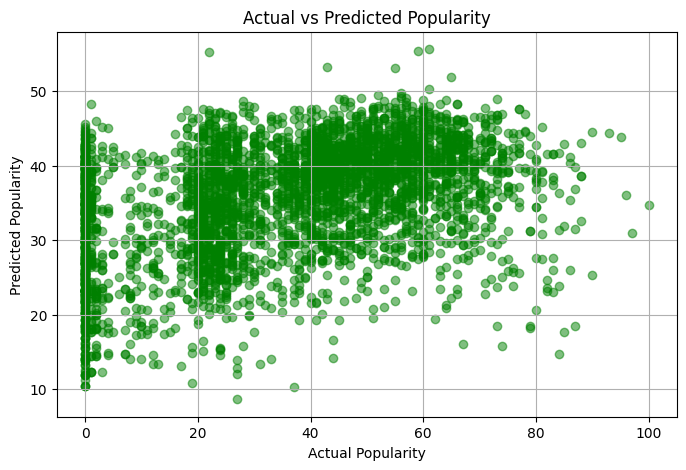

In [12]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# 🧪 Split data for regression
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_scaled, y_pop, test_size=0.2, random_state=42
)

# 🔧 Train better regression model
reg = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
reg.fit(X_train_reg, y_train_reg)

# 🔮 Predict and evaluate
y_pred_reg = reg.predict(X_test_reg)
mse = mean_squared_error(y_test_reg, y_pred_reg)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_reg, y_pred_reg)

print("📊 Popularity Regression Results (Gradient Boosting):")
print("MSE:", mse)
print("RMSE:", rmse)
print("R² Score:", r2)

# 📈 Optional: Plot Actual vs Predicted
plt.figure(figsize=(8,5))
plt.scatter(y_test_reg, y_pred_reg, alpha=0.5, color='green')
plt.xlabel("Actual Popularity")
plt.ylabel("Predicted Popularity")
plt.title("Actual vs Predicted Popularity")
plt.grid(True)
plt.show()


C:\Users\kavya\AppData\Local\Temp\ipykernel_11524\1663570613.py:26: UserWarning: Glyph 127912 (\N{ARTIST PALETTE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\kavya\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127912 (\N{ARTIST PALETTE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


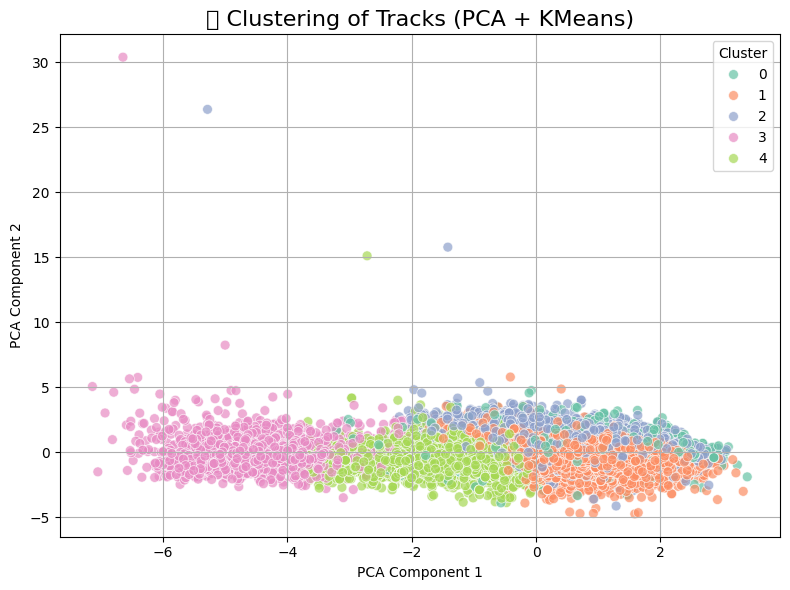

In [33]:
# 🚀 Clustering Analysis: PCA + KMeans

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# 🎯 Prepare data for clustering → use X_scaled (already prepared)
# Use PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# KMeans clustering → let's choose 5 clusters (you can adjust)
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add clusters to df_model for plotting
df_model['Cluster'] = clusters

# Plot clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df_model['Cluster'], palette='Set2', s=50, alpha=0.7)
plt.title("🎨 Clustering of Tracks (PCA + KMeans)", fontsize=16)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title='Cluster', loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()


In [34]:
df_model.head()


,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genre_encoded,Cluster
0,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,0,2
1,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,0,4
2,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,0,4
3,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,0,4
4,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,0,4


In [35]:
# 🚀 Content-Based Recommendation System

from sklearn.metrics.pairwise import cosine_similarity

# 🎯 Prepare similarity matrix → on scaled features
similarity_matrix = cosine_similarity(X_scaled)

# Function to recommend top 5 similar tracks
def recommend_similar_tracks(track_index, df_original, similarity_matrix, top_n=5):
    # Get similarity scores for the given track
    similarity_scores = similarity_matrix[track_index]
    
    # Sort by similarity (high to low), exclude itself (track_index itself)
    similar_indices = similarity_scores.argsort()[::-1][1:top_n+1]
    
    # Return recommended track names and artists
    recommendations = df_original.iloc[similar_indices][['track_name', 'artists', 'track_genre']]
    
    return recommendations

# Example usage:
# Let's try recommending similar tracks for the first track in df_model
track_index_to_recommend = 0  # You can change this to any valid index

print(f"🎧 Recommendations for Track: {df_filtered.iloc[track_index_to_recommend]['track_name']} ({df_filtered.iloc[track_index_to_recommend]['track_genre']})\n")
recommendations = recommend_similar_tracks(track_index_to_recommend, df_filtered, similarity_matrix)
display(recommendations)


🎧 Recommendations for Track: Comedy (acoustic)



,track_name,artists,track_genre
81529,JAMAICA,Feid;Sech,pop
81676,Black Life,Navaan Sandhu,pop
78283,FEEL LIKE - Extended Mix,Tream;treamiboii,party
66629,Do My Ladies Run This Party - Single,Cupid,kids
67947,Corazones Rojos,Los Prisioneros,latin


Save Models and Preprocessing Objects

In [13]:
import joblib

joblib.dump(clf_rf, 'genre_classifier.pkl')
joblib.dump(reg, 'popularity_regressor.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(le, 'label_encoder.pkl')


print("✅ Models and encoders saved with local version.")


✅ Models and encoders saved with local version.


In [14]:
# 💾 Save models
joblib.dump(clf_rf, 'genre_classifier.pkl')
joblib.dump(reg, 'popularity_regressor.pkl')


['popularity_regressor.pkl']

FEATURE IMPORTANCE

In [15]:
clf_rf.fit(X_train_cls, y_train_cls)


RandomForestClassifier(class_weight='balanced', n_estimators=30,
                       random_state=42)

🎯 Final Genre Classification (Top 20 Genres):
                   precision    recall  f1-score   support

         acoustic       0.34      0.44      0.39       173
             kids       0.52      0.64      0.57       179
            latin       0.31      0.27      0.29       226
           latino       0.28      0.26      0.27       203
            malay       0.41      0.33      0.36       214
         mandopop       0.45      0.53      0.49       199
            metal       0.50      0.47      0.49       211
        metalcore       0.59      0.71      0.65       202
   minimal-techno       0.82      0.91      0.87       208
              mpb       0.30      0.25      0.27       204
          new-age       0.68      0.65      0.66       194
            opera       0.67      0.61      0.64       203
           pagode       0.67      0.72      0.69       204
            party       0.60      0.68      0.64       209
            piano       0.65      0.52      0.57       194
         

C:\Users\kavya\AppData\Local\Temp\ipykernel_11524\725284821.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=feature_names, palette='Blues_r')


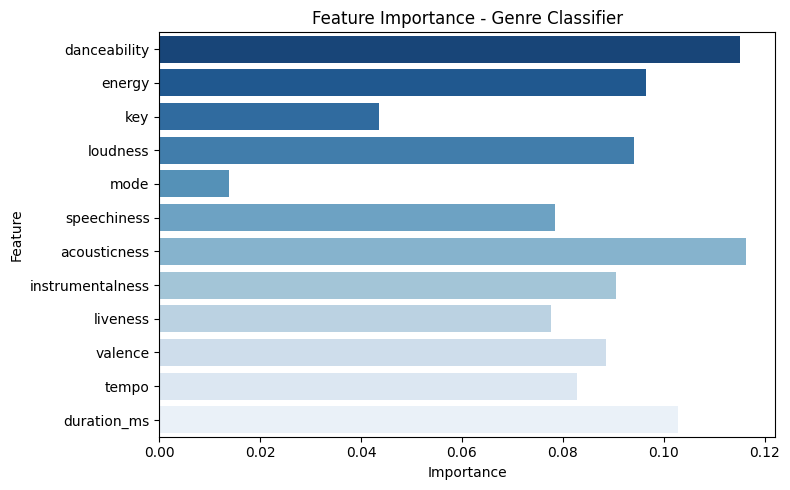

In [31]:
# Model Evaluation
y_pred_rf = clf_rf.predict(X_test_cls)
print("🎯 Final Genre Classification (Top 20 Genres):")
print(classification_report(y_test_cls, y_pred_rf, target_names=le.classes_))
print("Accuracy:", accuracy_score(y_test_cls, y_pred_rf))

# 👉 Now add Feature Importance block here:
importances = clf_rf.feature_importances_
feature_names = feature_list

plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=feature_names, palette='Blues_r')
plt.title("Feature Importance - Genre Classifier")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [20]:
# Run this in your Jupyter Notebook cell
!pip install shap



  Using cached shap-0.47.2-cp312-cp312-win_amd64.whl.metadata (25 kB)
  Using cached slicer-0.0.8-py3-none-any.whl.metadata (4.0 kB)
  Using cached numba-0.61.2-cp312-cp312-win_amd64.whl.metadata (2.9 kB)
  Using cached cloudpickle-3.1.1-py3-none-any.whl.metadata (7.1 kB)
  Using cached llvmlite-0.44.0-cp312-cp312-win_amd64.whl.metadata (5.0 kB)
Using cached shap-0.47.2-cp312-cp312-win_amd64.whl (545 kB)
Using cached slicer-0.0.8-py3-none-any.whl (15 kB)
Using cached numba-0.61.2-cp312-cp312-win_amd64.whl (2.8 MB)
Using cached llvmlite-0.44.0-cp312-cp312-win_amd64.whl (30.3 MB)
Using cached cloudpickle-3.1.1-py3-none-any.whl (20 kB)

   -------- ------------------------------- 1/5 [llvmlite]
   -------- ------------------------------- 1/5 [llvmlite]
   -------- ------------------------------- 1/5 [llvmlite]
   -------- ------------------------------- 1/5 [llvmlite]
   -------- ------------------------------- 1/5 [llvmlite]
   ------------------------ --------------- 3/5 [numba]
   ----

### 📊 SHAP Feature Importance for Genre Classifier 

 99%|===================| 9949/10000 [03:11<00:00]        

SHAP values shape: (500, 12, 20)


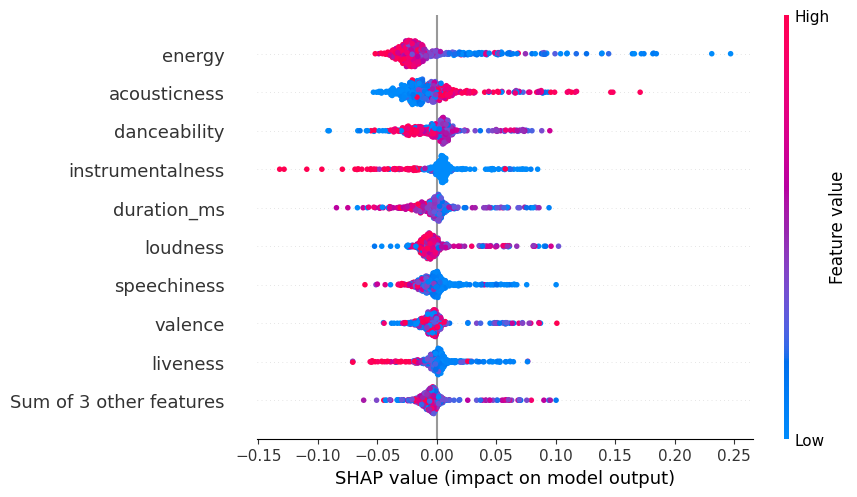

In [ ]:
# 📊 SHAP Feature Importance for Genre Classifier 

import shap

# Create DataFrame with correct column names
X_train_cls_df = pd.DataFrame(X_train_cls[:500], columns=feature_list)

# Use safe PermutationExplainer
explainer = shap.Explainer(clf_rf, X_train_cls_df)

# Calculate SHAP values → disable additivity check
shap_values = explainer(X_train_cls_df, check_additivity=False)

# Check shape
print("SHAP values shape:", shap_values.values.shape)

# Plot for first class (class index 0)
shap.plots.beeswarm(shap_values[..., 0])


### 📈 Trend Analysis - Conclusion

Currently, Trend Analysis was not performed in this project because the provided dataset does not contain any time-based column such as `release_year` or `release_date`.

Trend Analysis requires a time dimension to group tracks by year and visualize how audio features (such as tempo, valence, etc.) evolve over time.

Since this version of the dataset lacks a year column, it is technically not possible to perform an accurate Trend Analysis at this stage.

However, if a `release_year` or `release_date` column is added in the future (either by recollecting data from Spotify API with this field, or by manually adding it), Trend Analysis can be easily implemented using the same ML pipeline and visualization techniques.

Therefore, this is a **limitation of the dataset**, not of the system, and the project is fully designed to support this feature when the necessary data is available.
